In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# !wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [3]:
# !unzip /content/cats_and_dogs_filtered.zip

In [4]:
data_root = '/content/cats_and_dogs_filtered'

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
img = image.load_img('/content/cats_and_dogs_filtered/train/cats/cat.0.jpg')
type(img)

PIL.JpegImagePlugin.JpegImageFile

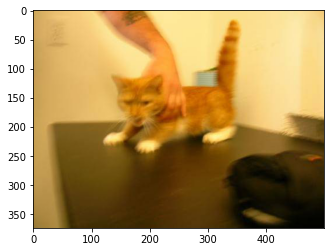

In [7]:
plt.imshow(img)

In [8]:
x = image.img_to_array(img)
print(x.shape)
print(x.dtype)

(374, 500, 3)
float32


In [9]:
x = x.astype('int').reshape((1,374, 500, 3))
x.shape

(1, 374, 500, 3)

In [10]:
# random으로 밑에 것중 골라서 이미지가 증강됨
gen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range=0.4,
    height_shift_range=0.4,
    vertical_flip=True,
    horizontal_flip=True
)

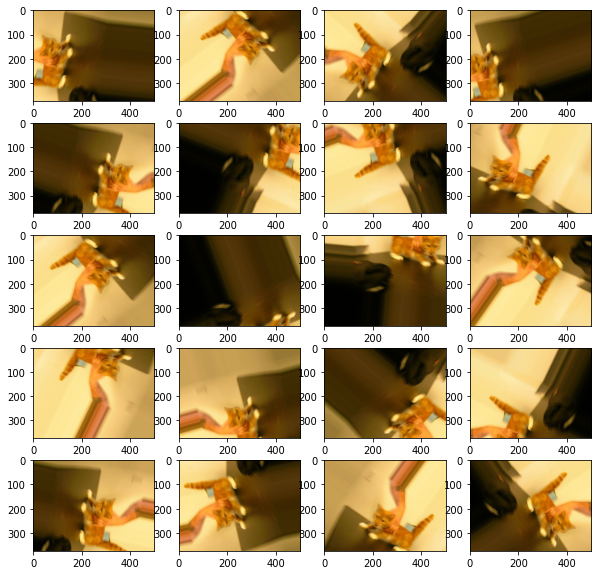

In [11]:
idx = 0
axs = []
fig = plt.figure(figsize=(10,10))
for batch in gen.flow(x,batch_size=1):
  axs.append(fig.add_subplot(5,4,idx+1))
  axs[idx].imshow(image.array_to_img(batch[0]))
  idx = idx+1
  if idx%20 == 0:
    break
plt.show()

In [12]:
import os

train_dir = os.path.join(data_root,'train')
val_dir = os.path.join(data_root,'validation')

In [27]:
# random으로 밑에 것중 골라서 이미지가 증강됨
train_gen = ImageDataGenerator(
    # 이미지를 1/255로 만들어줌 rescale은 이미지 불러올때마다 모두 정규화시켜줌
    rescale=1./255.,
    rotation_range = 90,
    width_shift_range=0.4,
    height_shift_range=0.4,
    vertical_flip=True,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(
    rescale=1./255.
)


In [28]:
BATCH_SIZE = 32
IMAGE_SIZE = (224,224)


train_iter = train_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary'
)

val_iter = val_gen.flow_from_directory(
    val_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary'
)

type(train_iter), type(val_iter)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(keras.preprocessing.image.DirectoryIterator,
 keras.preprocessing.image.DirectoryIterator)

In [22]:
images,labels = train_iter.next()
len(images),len(labels)

(32, 32)

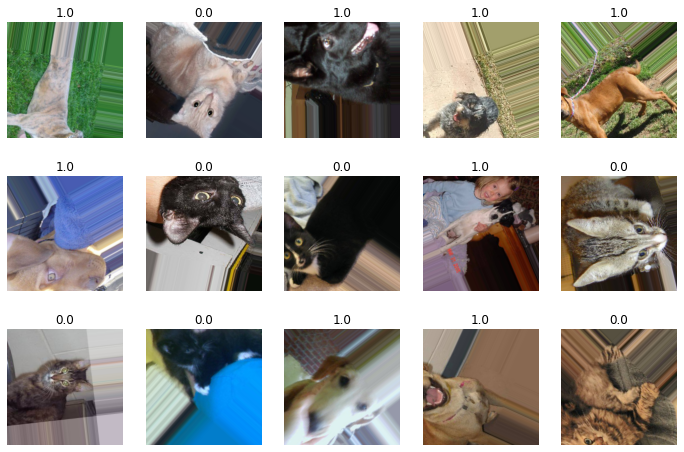

In [23]:
plt.figure(figsize=(12,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.axis('off')
  plt.imshow(images[i])
  plt.title(labels[i])
plt.show()

In [29]:
def build_model():
    model = keras.Sequential([
        # padding 
        # default값은 valid
        # same은 이미지 크기가 변하지 않게 패딩을 준다.
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape = (224,224,3)),
        layers.MaxPool2D(2),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),

        layers.Flatten(),
        layers.Dropout(0.3),

        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['acc']
    )
    return model

In [30]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 128)      0

In [31]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(train_iter,
                epochs=EPOCHS,
                validation_data = val_iter,
                verbose=1)

Epoch 1/30
63/63 [==============================] - 30s 465ms/step - loss: 0.7003 - acc: 0.5105 - val_loss: 0.6799 - val_acc: 0.5010
Epoch 2/30
63/63 [==============================] - 30s 477ms/step - loss: 0.6871 - acc: 0.5135 - val_loss: 0.6934 - val_acc: 0.5020
Epoch 3/30
63/63 [==============================] - 38s 602ms/step - loss: 0.6936 - acc: 0.5005 - val_loss: 0.6929 - val_acc: 0.5020
Epoch 4/30
63/63 [==============================] - 29s 462ms/step - loss: 0.6930 - acc: 0.4950 - val_loss: 0.6921 - val_acc: 0.5060
Epoch 5/30
63/63 [==============================] - 31s 497ms/step - loss: 0.6905 - acc: 0.5165 - val_loss: 0.6655 - val_acc: 0.5980
Epoch 6/30
63/63 [==============================] - 30s 484ms/step - loss: 0.6934 - acc: 0.5015 - val_loss: 0.6928 - val_acc: 0.5010
Epoch 7/30
63/63 [==============================] - 30s 483ms/step - loss: 0.6838 - acc: 0.5250 - val_loss: 0.6780 - val_acc: 0.5460
Epoch 8/30
63/63 [==============================] - 31s 489ms/step - 

KeyboardInterrupt: ignored

In [34]:
train_gen = ImageDataGenerator(
    # 이미지를 1/255로 만들어줌 rescale은 이미지 불러올때마다 모두 정규화시켜줌
    rescale=1./255.,
    rotation_range = 90,
    width_shift_range=0.4,
    height_shift_range=0.4,
    vertical_flip=True,
    horizontal_flip=True,
    validation_split=True
)

In [35]:
train_iter = train_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary',
    subset='training'
)

val_iter = train_gen.flow_from_directory(
    val_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary',
    subset='validation'
)

test_iter = test_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [36]:
EPOCHS = 10
BATCH_SIZE = 32

log = model.fit(train_iter,
                epochs=EPOCHS,
                validation_data = val_iter,
                verbose=1)

Epoch 1/10
63/63 [==============================] - 28s 444ms/step - loss: 0.6931 - acc: 0.5010
Epoch 2/10
63/63 [==============================] - 31s 485ms/step - loss: 0.6931 - acc: 0.4900
Epoch 3/10
63/63 [==============================] - 26s 410ms/step - loss: 0.6928 - acc: 0.5010
Epoch 4/10
63/63 [==============================] - 26s 412ms/step - loss: 0.6928 - acc: 0.5030
Epoch 5/10
63/63 [==============================] - 26s 404ms/step - loss: 0.6994 - acc: 0.5025
Epoch 6/10
63/63 [==============================] - 26s 407ms/step - loss: 0.6877 - acc: 0.5160
Epoch 7/10
63/63 [==============================] - 26s 420ms/step - loss: 0.6818 - acc: 0.5285
Epoch 8/10
63/63 [==============================] - 25s 403ms/step - loss: 0.6843 - acc: 0.5440
Epoch 9/10
63/63 [==============================] - 25s 404ms/step - loss: 0.6934 - acc: 0.5005
Epoch 10/10
63/63 [==============================] - 26s 408ms/step - loss: 0.6932 - acc: 0.5000
